In [1]:
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx
import random

In [2]:
G = nx.Graph()
nodes = [0, 1, 2, 3, 4, 5, 6]
edges = [(0, 1), (0, 2), (0, 3), (1, 2), (1, 4), (2, 3), (2, 5), (3, 6), (4, 5), (5, 6)]
G.add_nodes_from(nodes)
G.add_edges_from(edges)

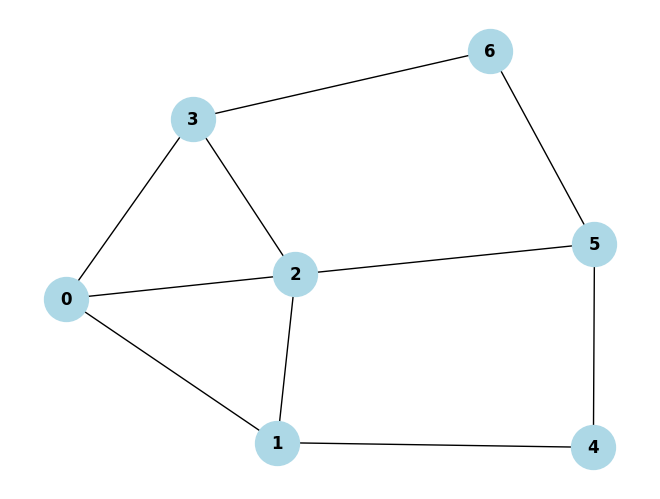

In [3]:
# 可視化: 形状を固定する
nx.draw(G, pos=nx.spring_layout(G, seed=0), with_labels=True, node_color='lightblue', edge_color='black', font_weight='bold', node_shape='o', node_size=1000)
plt.show()

In [15]:
class RandomWalk:
    def __init__(self, G: nx.Graph, num_walks: int, length_walk: int):
        self.G = G
        self.num_walks = num_walks
        self.length_walk = length_walk

        self.nodes = list(G.nodes()) # ノードのリスト

    def RandomWalk(self, start_node: int) -> np.ndarray:
        """ランダムウォークを行う

        Args:
            G (nx.Graph): グラフ
            start_node (int): 開始ノード
            num_walks (int): ウォーク数
            length_walk (int): ウォークの長さ

        Returns:
            np.ndarray: ウォーク結果
        """
        walks = [] # ウォーク結果

        # ウォーク数分繰り返す
        for _ in range(self.num_walks):
            walk = [start_node] # ウォークの初期化
            
            while len(walk) < self.length_walk:
                node = random.choice(list(self.G.neighbors(walk[-1]))) # 隣接ノードからランダムに選択
                walk.append(node) # ウォークに追加
            walks.append(walk) # ウォーク結果に追加
        return np.array(walks)
    
    def get_sample(self) -> np.ndarray:
        """サンプリング

        Returns:
            np.ndarray: サンプリング結果
        """
        sample = np.empty((0, self.length_walk), dtype=np.int32)
        for node in self.nodes:
            sample = np.concatenate((sample, self.RandomWalk(node)))
        return np.array(sample)


In [2]:
def make_random_walks(G, num_walk, length_of_walk):
    #ランダムウォークで歩いたノードを入れるlistを生成
    paths = list()
    #ランダムウォークを擬似的に行う
    for i in range(num_walk):
        node_list = list(G.nodes())
        for node in node_list:
            now_node = node
            #到達したノードを追加する用のリストを用意する
            path = list()
            path.append(str(now_node))
            for j in range(length_of_walk):
                #次に到達するノードを選択する
                next_node = random.choice(list(G.neighbors(now_node)))
                #リストに到達したノードをリストに追加する
                path.append(str(next_node))
                #今いるノードを「現在地」とする
                now_node = next_node
            #ランダムウォークしたノードをリストに追加
            paths.append(path)
        #訪れたノード群を返す
    return paths

In [5]:
random_walk = RandomWalk(G, num_walks=10, length_walk=10)
sample = random_walk.get_sample()
sample.shape

(70, 10)

In [6]:
from gensim.models import word2vec
sample_str = [[str(node) for node in walk] for walk in sample]
model = word2vec.Word2Vec(sample_str, vector_size=2, window=2, min_count=0, sg=1, epochs=10000)

In [7]:
sample.shape

(70, 5)

In [8]:
z = model.wv.vectors
labels = [str(node) for node in model.wv.index_to_key]

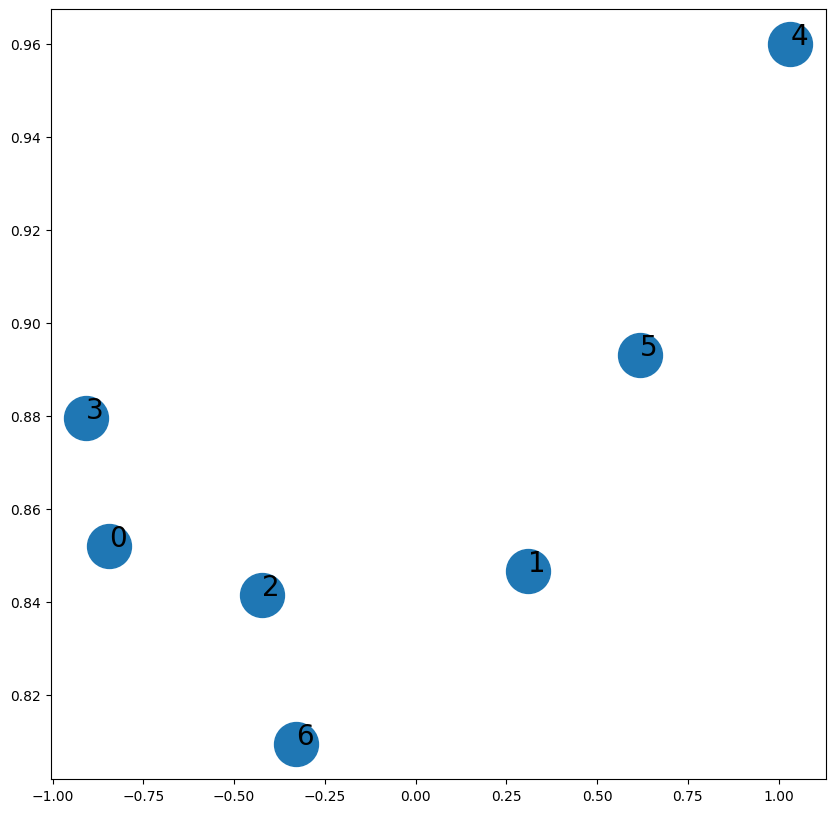

In [9]:
plt.figure(figsize=(10, 10))
plt.scatter(z[:, 0], z[:, 1], s=1000)
for i, label in enumerate(labels):
    plt.annotate(label, (z[i, 0], z[i, 1]), fontsize=20)
plt.show()

In [4]:
G = nx.karate_club_graph()

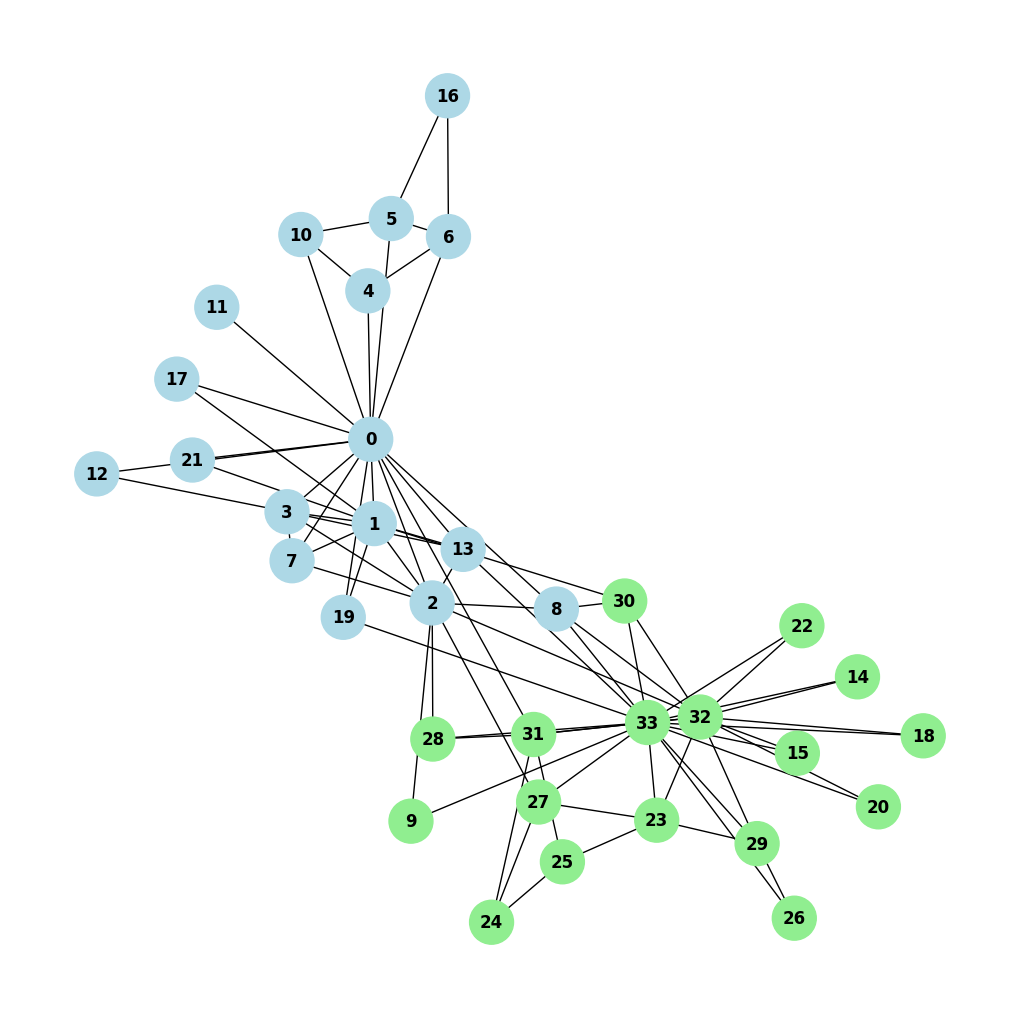

In [5]:
# 可視化: 形状を固定する
plt.figure(figsize=(10, 10))
colors = ['lightblue' if node[1]['club'] == 'Mr. Hi' else 'lightgreen' for node in G.nodes(data=True)]
nx.draw(G, pos=nx.spring_layout(G, seed=1), with_labels=True, node_color=colors, edge_color='black', font_weight='bold', node_shape='o', node_size=1000)
plt.show()

In [8]:
len(G.nodes())

34

In [16]:
random_walk = RandomWalk(G, num_walks=512, length_walk=512)
sample = random_walk.get_sample()
sample.shape

(17408, 512)

In [5]:
sample = make_random_walks(G, 512, 512)

In [10]:
sample

array([['0', '6', '4', ..., '12', '3', '2'],
       ['0', '7', '2', ..., '13', '3', '7'],
       ['0', '19', '1', ..., '10', '0', '1'],
       ...,
       ['33', '20', '32', ..., '13', '1', '30'],
       ['33', '28', '33', ..., '32', '18', '33'],
       ['33', '32', '15', ..., '29', '26', '29']], dtype='<U11')

In [17]:
from gensim.models import word2vec
sample_str = [[str(node) for node in walk] for walk in sample]
model = word2vec.Word2Vec(sample_str, vector_size=2, window=10, min_count=1, sg=1)
# model = word2vec.Word2Vec(sample_str, min_count = 1, vector_size = 2, window = 10, workers = 1)

In [18]:
z = model.wv.vectors
labels = [str(node) for node in model.wv.index_to_key]

In [19]:
G.nodes(data=True)[0]

{'club': 'Mr. Hi'}

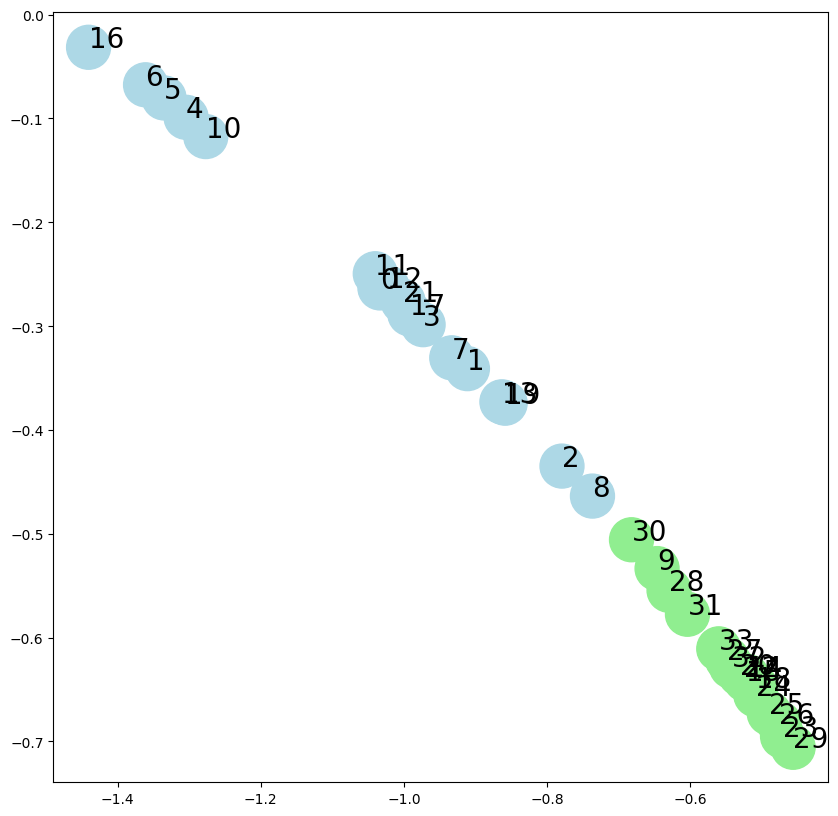

In [20]:
plt.figure(figsize=(10, 10))

colors = ['lightblue' if G.nodes(data=True)[int(label)]["club"] == 'Mr. Hi' else 'lightgreen' for label in labels]
plt.scatter(z[:, 0], z[:, 1], s=1000, c=colors)
for i, label in enumerate(labels):
    plt.annotate(label, (z[i, 0], z[i, 1]), fontsize=20)
plt.show()

In [64]:
import matplotlib.pyplot as plt
import random
import networkx as nx

def make_random_walks(G, num_walk, length_of_walk):
    #ランダムウォークで歩いたノードを入れるlistを生成
    paths = list()
    #ランダムウォークを擬似的に行う
    for i in range(num_walk):
        node_list = list(G.nodes())
        for node in node_list:
            now_node = node
            #到達したノードを追加する用のリストを用意する
            path = list()
            path.append(str(now_node))
            for j in range(length_of_walk):
                #次に到達するノードを選択する
                next_node = random.choice(list(G.neighbors(now_node)))
                #リストに到達したノードをリストに追加する
                path.append(str(next_node))
                #今いるノードを「現在地」とする
                now_node = next_node
            #ランダムウォークしたノードをリストに追加
            paths.append(path)
        #訪れたノード群を返す
    return paths

In [65]:
walking = make_random_walks(G, 512, 512)

In [66]:
np_walking = np.array(walking)
np_walking.shape

(17408, 513)

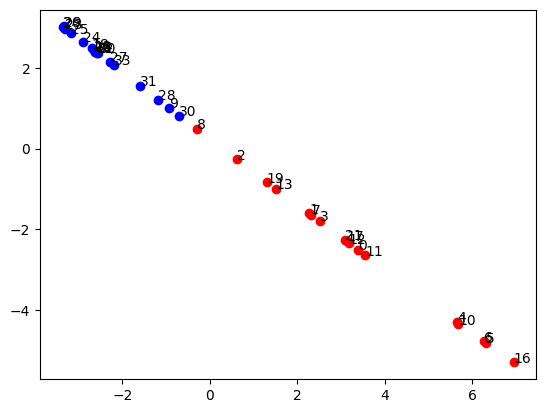

In [67]:
from gensim.models import Word2Vec as word2vec

G = nx.karate_club_graph()
#
walking = make_random_walks(G, 512, 512)
model = word2vec(walking, min_count = 1, vector_size = 2, window = 10, workers = 1)

x = list()
y = list()
node_list = list()
colors = list()
fig, ax = plt.subplots()
for node in G.nodes:
    #int型のままではイテレートできないので、string型に変換する
    vector = model.wv[str(node)]  
    x.append(vector[0])
    y.append(vector[1])
    #注釈として、ノードの番号を追記する
    #座標(x,y)は(vector[0],vector[1])を指定
    ax.annotate(str(node), (vector[0], vector[1]))
    if G.nodes[node]['club'] == 'Mr. Hi':
        colors.append('red')
    else:
        colors.append('blue')
for i in range(len(x)):
    ax.scatter(x[i], y[i], c=colors[i])
plt.show()

In [43]:
walking = make_random_walks(G, 512, 512)
walking = np.array(walking)
walking.shape

(34, 513)

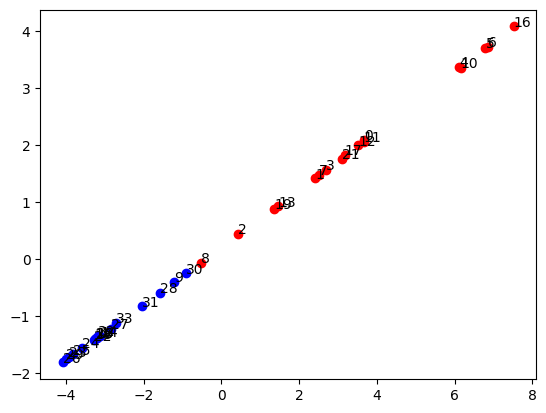

In [21]:
from gensim.models import Word2Vec as word2vec

G = nx.karate_club_graph()
walking = make_random_walks(G, 512, 512)
model = word2vec(walking, min_count = 1, vector_size = 2, window = 10, workers = 1)

x = list()
y = list()
node_list = list()
colors = list()
fig, ax = plt.subplots()
for node in G.nodes:
    #int型のままではイテレートできないので、string型に変換する
    vector = model.wv[str(node)]  
    x.append(vector[0])
    y.append(vector[1])
    #注釈として、ノードの番号を追記する
    #座標(x,y)は(vector[0],vector[1])を指定
    ax.annotate(str(node), (vector[0], vector[1]))
    if G.nodes[node]['club'] == 'Mr. Hi':
        colors.append('red')
    else:
        colors.append('blue')
for i in range(len(x)):
    ax.scatter(x[i], y[i], c=colors[i])
plt.show()
